In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
!roslaunch hector_slam_launch
!tutorial.launch

'roslaunch' is not recognized as an internal or external command,
operable program or batch file.
'tutorial.launch' is not recognized as an internal or external command,
operable program or batch file.


In [11]:
!rosrun map_server map_saver -f ~/map

'rosrun' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
# Dummy LiDAR data (example: 360-degree scan with 10 points)
lidar_data = np.array([
    [1.0, 0.1],
    [1.1, 0.2],
    [1.2, 0.3],
    [1.3, 0.4],
    [1.4, 0.5],
    [1.5, 0.6],
    [1.6, 0.7],
    [1.7, 0.8],
    [1.8, 0.9],
    [1.9, 1.0]
])

# Initial robot pose (x, y, theta)
robot_pose = np.array([0.0, 0.0, 0.0])

# Initialize the map (an empty list of landmarks)
landmarks = []

# SLAM algorithm (simplified EKF-SLAM)
for scan in lidar_data:
    # Simulated robot motion (for demonstration)
    robot_pose += np.array([0.1, 0.0, 0.05])  # Move forward and turn slightly
    
    # Simulated landmark detection and mapping (for demonstration)
    detected_landmark = np.array([
        robot_pose[0] + scan[0] * np.cos(robot_pose[2]),
        robot_pose[1] + scan[0] * np.sin(robot_pose[2])
    ])
    
    landmarks.append(detected_landmark)

# Print the estimated robot pose and mapped landmarks
print("Estimated Robot Pose (x, y, theta):", robot_pose)
print("Mapped Landmarks:")
for i, landmark in enumerate(landmarks):
    print(f"Landmark {i + 1}: ({landmark[0]:.2f}, {landmark[1]:.2f})")


Estimated Robot Pose (x, y, theta): [1.  0.  0.5]
Mapped Landmarks:
Landmark 1: (1.10, 0.05)
Landmark 2: (1.29, 0.11)
Landmark 3: (1.49, 0.18)
Landmark 4: (1.67, 0.26)
Landmark 5: (1.86, 0.35)
Landmark 6: (2.03, 0.44)
Landmark 7: (2.20, 0.55)
Landmark 8: (2.37, 0.66)
Landmark 9: (2.52, 0.78)
Landmark 10: (2.67, 0.91)


In [20]:
# Define constants
NUM_POSITIONS = 50
ROOM_WIDTH = 10
ROOM_HEIGHT = 10
SENSOR_STDDEV = 0.1

In [21]:
def generate_dummy_data():
    """Generate dummy LiDAR sensor data and ground truth poses."""
    poses = []
    measurements = []

    for _ in range(NUM_POSITIONS):
        x = np.random.uniform(0, ROOM_WIDTH)
        y = np.random.uniform(0, ROOM_HEIGHT)
        theta = np.random.uniform(0, 2 * np.pi)
        poses.append((x, y, theta))

        # Simulate LiDAR measurements to four walls
        measurements.append([])
        for _ in range(4):
            wall_x = ROOM_WIDTH if np.random.rand() < 0.5 else 0
            wall_y = np.random.uniform(0, ROOM_HEIGHT)
            delta_x = wall_x - x
            delta_y = wall_y - y
            distance = np.sqrt(delta_x**2 + delta_y**2)
            angle = np.arctan2(delta_y, delta_x) - theta
            measurement = (distance + np.random.randn() * SENSOR_STDDEV, angle + np.random.randn() * SENSOR_STDDEV)
            measurements[-1].append(measurement)

    return poses, measurements

In [22]:
def slam(poses, measurements):
    """Implement a basic SLAM algorithm."""
    landmarks = []  # List to store estimated landmark positions

    for i in range(NUM_POSITIONS):
        # Process measurements at each position
        for j in range(4):
            distance, angle = measurements[i][j]
            x = poses[i][0] + distance * np.cos(poses[i][2] + angle)
            y = poses[i][1] + distance * np.sin(poses[i][2] + angle)
            landmarks.append((x, y))

    return landmarks

In [55]:
def main():
    # Generate dummy data
    poses, measurements = generate_dummy_data()

    # Run SLAM
    estimated_landmarks = slam(poses, measurements)

    # Plot the room and estimated landmarks
    plt.figure(figsize=(5, 5))
    plt.plot([0, ROOM_WIDTH, ROOM_WIDTH, 0, 0], [0, 0, ROOM_HEIGHT, ROOM_HEIGHT, 0], 'b-', label='Room')
    plt.scatter(*zip(*estimated_landmarks), c='orange', marker='.', label='Estimated Landmarks')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.title('Room Mapping with LiDAR and SLAM')
    plt.show()

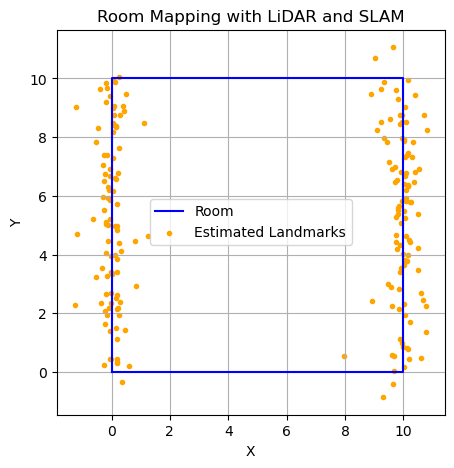

In [56]:
if __name__ == "__main__":
    main()

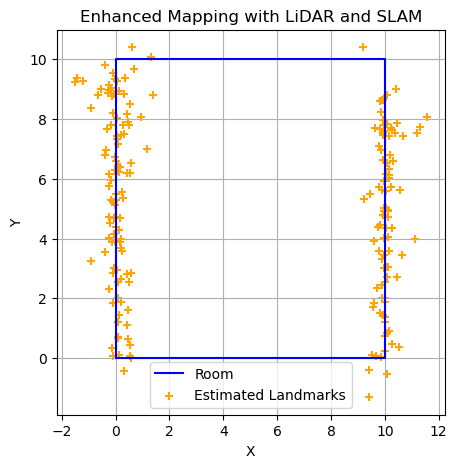

In [57]:
# Constants
NUM_POSITIONS = 50
ROOM_WIDTH = 10
ROOM_HEIGHT = 10
SENSOR_STDDEV = 0.1

def generate_poses(num_positions, room_width, room_height):
    """Generate random robot poses within the room."""
    poses = []
    for _ in range(num_positions):
        x = np.random.uniform(0, room_width)
        y = np.random.uniform(0, room_height)
        theta = np.random.uniform(0, 2 * np.pi)
        poses.append((x, y, theta))
    return poses

def generate_measurements(poses, room_width, room_height, sensor_stddev):
    """Generate LiDAR-like measurements based on poses and room structure."""
    measurements = []
    for pose in poses:
        x, y, theta = pose
        measurements.append([])
        for _ in range(4):
            wall_x = room_width if np.random.rand() < 0.5 else 0
            wall_y = np.random.uniform(0, room_height)
            delta_x = wall_x - x
            delta_y = wall_y - y
            distance = np.sqrt(delta_x**2 + delta_y**2)
            angle = np.arctan2(delta_y, delta_x) - theta
            measurement = (distance + np.random.randn() * sensor_stddev, angle + np.random.randn() * sensor_stddev)
            measurements[-1].append(measurement)
    return measurements

def estimate_landmarks(poses, measurements):
    """Estimate landmarks from poses and measurements."""
    landmarks = []
    for i in range(len(poses)):
        for j in range(len(measurements[i])):
            x = poses[i][0] + measurements[i][j][0] * np.cos(poses[i][2] + measurements[i][j][1])
            y = poses[i][1] + measurements[i][j][0] * np.sin(poses[i][2] + measurements[i][j][1])
            landmarks.append((x, y))
    return landmarks

def plot_room_and_landmarks(room_width, room_height, landmarks):
    """Plot the room and estimated landmarks."""
    plt.figure(figsize=(5, 5))
    plt.plot([0, room_width, room_width, 0, 0], [0, 0, room_height, room_height, 0], 'b-', label='Room')
    plt.scatter(*zip(*landmarks), c='orange', marker='+', label='Estimated Landmarks')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.title('Enhanced Mapping with LiDAR and SLAM')
    plt.show()

def main():
    # Generate random poses and measurements
    poses = generate_poses(NUM_POSITIONS, ROOM_WIDTH, ROOM_HEIGHT)
    measurements = generate_measurements(poses, ROOM_WIDTH, ROOM_HEIGHT, SENSOR_STDDEV)

    # Estimate landmarks using SLAM-like approach
    estimated_landmarks = estimate_landmarks(poses, measurements)

    # Plot the room and estimated landmarks
    plot_room_and_landmarks(ROOM_WIDTH, ROOM_HEIGHT, estimated_landmarks)

if __name__ == "__main__":
    main()



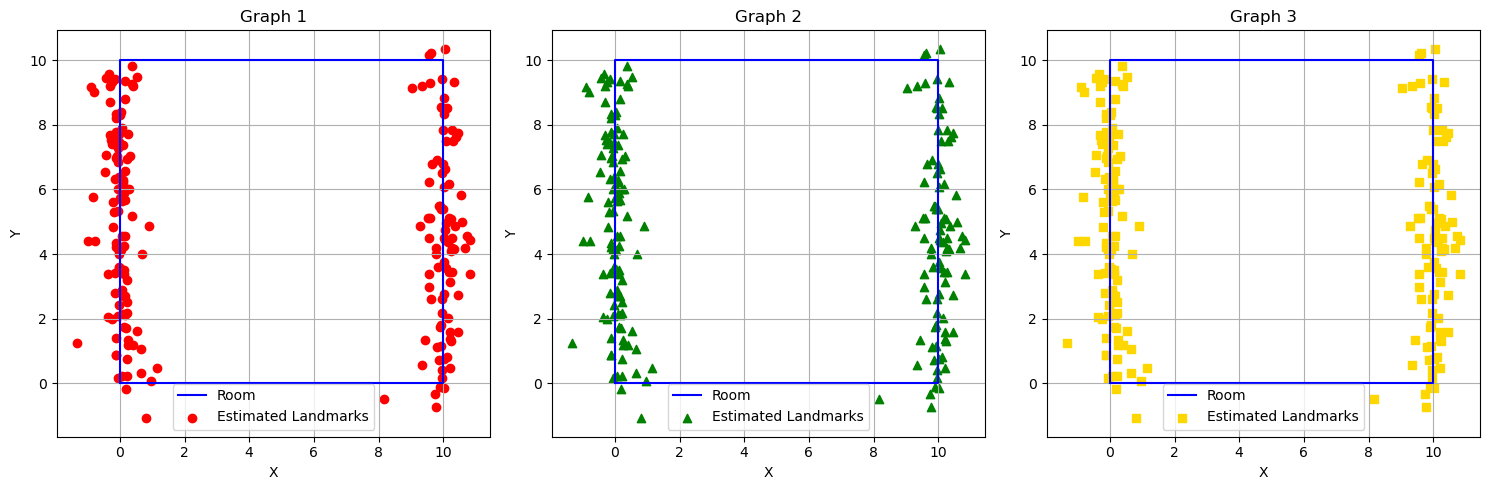

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
NUM_POSITIONS = 50
ROOM_WIDTH = 10
ROOM_HEIGHT = 10
SENSOR_STDDEV = 0.1

def generate_poses(num_positions, room_width, room_height):
    """Generate random robot poses within the room."""
    poses = []
    for _ in range(num_positions):
        x = np.random.uniform(0, room_width)
        y = np.random.uniform(0, room_height)
        theta = np.random.uniform(0, 2 * np.pi)
        poses.append((x, y, theta))
    return poses

def generate_measurements(poses, room_width, room_height, sensor_stddev):
    """Generate LiDAR-like measurements based on poses and room structure."""
    measurements = []
    for pose in poses:
        x, y, theta = pose
        measurements.append([])
        for _ in range(4):
            wall_x = room_width if np.random.rand() < 0.5 else 0
            wall_y = np.random.uniform(0, room_height)
            delta_x = wall_x - x
            delta_y = wall_y - y
            distance = np.sqrt(delta_x**2 + delta_y**2)
            angle = np.arctan2(delta_y, delta_x) - theta
            measurement = (distance + np.random.randn() * sensor_stddev, angle + np.random.randn() * sensor_stddev)
            measurements[-1].append(measurement)
    return measurements

def estimate_landmarks(poses, measurements):
    """Estimate landmarks from poses and measurements."""
    landmarks = []
    for i in range(len(poses)):
        for j in range(len(measurements[i])):
            x = poses[i][0] + measurements[i][j][0] * np.cos(poses[i][2] + measurements[i][j][1])
            y = poses[i][1] + measurements[i][j][0] * np.sin(poses[i][2] + measurements[i][j][1])
            landmarks.append((x, y))
    return landmarks

def plot_room_and_landmarks(ax, room_width, room_height, landmarks, title, marker_style, color):
    """Plot the room and estimated landmarks with specific markings and colors in a subplot."""
    ax.plot([0, room_width, room_width, 0, 0], [0, 0, room_height, room_height, 0], 'b-', label='Room')
    ax.scatter(*zip(*landmarks), c=color, marker=marker_style, label='Estimated Landmarks')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.grid(True)
    ax.set_title(title)

def main():
    # Generate random poses and measurements
    poses = generate_poses(NUM_POSITIONS, ROOM_WIDTH, ROOM_HEIGHT)
    measurements = generate_measurements(poses, ROOM_WIDTH, ROOM_HEIGHT, SENSOR_STDDEV)

    # Estimate landmarks using SLAM-like approach
    estimated_landmarks = estimate_landmarks(poses, measurements)

    # Create a figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Create and display the three distinct graphs side by side
    plot_room_and_landmarks(axes[0], ROOM_WIDTH, ROOM_HEIGHT, estimated_landmarks, 'Graph 1', 'o', 'r')
    plot_room_and_landmarks(axes[1], ROOM_WIDTH, ROOM_HEIGHT, estimated_landmarks, 'Graph 2', '^', 'g')
    plot_room_and_landmarks(axes[2], ROOM_WIDTH, ROOM_HEIGHT, estimated_landmarks, 'Graph 3', 's', 'gold')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


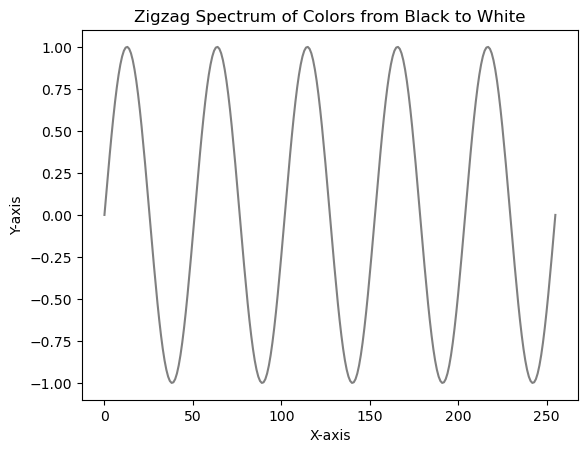

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of colors from black to white
colors = np.linspace(0, 1, 256)

# Create a zigzag pattern using sine function
zigzag = np.sin(np.linspace(0, 10 * np.pi, 256))

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the zigzag pattern with the grayscale colormap
ax.plot(zigzag, color='gray')

# Set the title and labels
ax.set_title('Zigzag Spectrum of Colors from Black to White')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Show the plot
plt.show()
